In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

In [3]:
# Mock data
# It is a dictionary with a disease name as key and a dictionary as item
# The item dictionary contains two 
data = {'schizophrenia': {'human_gene': [('FFTR', 'ENS000234'), ('LGPG', 'ENS0002145')],
                          'mouse_gene': [('FFTR', 'ENS00098234'), ('LGPG', 'ENS00021345')],
                          'human_protein': [('fftr', 'Uni12432', 'JKJSNERGIU'), ('lgpg', 'Uni12987', 'OUIHJWRTGUNRTSG')],
                          'mouse_protein': [('fftr', 'Uni67932', 'AAGPALOUHSKFGJD'), ('lgpg', 'Uni0933', 'OIUHJFGOUIBHFER')]
                          },
        'diabetes': {'human_gene': [('TTRY', 'ENS00022356345'), ('UMHK', 'ENS00024635'), ('GFDS', 'ENS000556323')],
                    'mouse_gene': [('TTRY', 'ENS0003467'), ('UMHK', 'ENS000234667'), ('GFDS', 'ENS0005478786')],
                    'human_protein': [('ttry', 'Uni18787', 'UIHWTGOUHRTE'), ('umhk', 'Uni1670876', 'OIJBETEY'), ('gfds', 'Uni1986734', 'KJNDBG')],
                    'mouse_protein': [('ttry', 'Uni67096', 'OIJSEROGIJSRT'), ('umhk', 'Uni678967', 'OIJRTHOITY'), ('gfds', 'Uni1246789', 'LKSNMETRBHJLRSDNBG')]
                    }
        }

In [12]:
import pickle as pkl
# open data.pkl in the folder above
with open('../data.pkl', 'rb') as f:
    data = pkl.load(f)
print(data)

{'bipolar disorder': {'human_gene': [('BTBD16', 'ENSG00000138152'), ('ZNF804A', 'ENSG00000170396'), ('GPR50', 'ENSG00000102195'), ('NYX', 'ENSG00000188937'), ('ARK2C', 'ENSG00000141622'), ('ALG9', 'ENSG00000086848'), ('PCLO', 'ENSG00000186472'), ('SP4', 'ENSG00000105866')], 'mouse_gene': [('BTBD16', 'ENSMUSG00000040298'), ('ZNF804A', 'ENSMUSG00000070866'), ('GPR50', 'ENSMUSG00000056380'), ('NYX', 'ENSMUSG00000051228'), ('ARK2C', 'ENSMUSG00000025427'), ('ALG9', 'ENSMUSG00000032059'), ('PCLO', 'ENSMUSG00000061601'), ('SP4', 'ENSMUSG00000025323')], 'human_protein': [('BTBD16', 'Q32M84', 'MIMSNTHKARLERRVTGSTNRWRLPKQPFSGDLLSLSQMCKALSIDFEEALRNPDRLCISQIQKFFFENFKNKDIQSGEADVILECLGFKWELHQPQLFQSETLAKLYLKALAQGTTHPLRELEELLRAQSPKKTKEKSPAKRIIISLKINDPLVTKVAFATALKNLYMSEVEINLEDLLGVLASAHILQFSGLFQRCVDVMIARLKPSTIKKFYEAGCKYKEEQLTTGCEKWLEMNLVPLGGTQIHLHKIPQDLLHKVLKSPRLFTFSEFHLLKTMLLWVFLQLNYKIQAIPTYETVMTFFKSFPENCCFLDRDIGRSLRPLFLCLRLHGITKGKDLEVLRHLNFFPESWLDQVTVNHYHALENGGDMVHLKDLNTQAVRFGLLFNQENTTYSKTIALYGFFFKIKG

In [13]:
# Create an empty graph
M = nx.Graph()

# Read mock dataset
# iterate through keys of the dictionary (disease)
for disease in data.keys():
    M.add_node(disease, type="Disease") # print disease name
    disease_data = data[disease]  # get the dictionary of the disease, which contains the gene and protein data
    for element in disease_data.keys():  # iterate through the keys of the disease dictionary, i.e. the gene and protein data
        # print(element)  # print the key of the dictionary, e.g. human_gene
        species_type, type = element.split('_')  # split the key into species and type
        # print(species, type)
        element_list = disease_data[element]  # get the list of genes or proteins
        #print(len(element_list)) 
        for i, item in enumerate(element_list):  # iterate through the list of genes or proteins
            # print(item)
            if type == 'gene':  # if the type is gene, then the item is a tuple of gene symbol and gene id
                gene_symbol, gene_id = item
                #print(gene_id, gene_symbol, species_type)
                # check if node is already present in the graph
                if gene_id not in M.nodes:
                    M.add_node(gene_id, name = gene_symbol, species = species_type, type= "Gene") 
                if species_type == "human":
                    M.add_edge(gene_id, disease, type="Association")
                elif species_type == "mouse":
                    mouse_gene = data[disease][species_type + '_gene'][i]
                    human_gene = data[disease]['human_gene'][i]
                    M.add_edge(mouse_gene[1], human_gene[1], type="Orthology")

                # check if the gene is already present in the nodes of the graph
                #if gene_symbol in G.nodes:
                    # if the gene is already present, then add the disease as a node attribute
                   # G.nodes[gene_symbol]['disease'] = disease
                # print(gene_symbol, gene_id)
            elif type == 'protein':  # if the type is protein, then the item is a tuple of protein name, protein id and protein sequence
                protein_symbol, protein_id, protein_sequence = item 
                if protein_id not in M.nodes:
                    M.add_node(protein_id, name = protein_symbol, species = species_type, sequence = protein_sequence, type= "Protein") 
                gene_associated = data[disease][species_type + '_gene'][i]
                gene_id = gene_associated[1]
                M.add_edge(protein_id, gene_id, type="Expression")

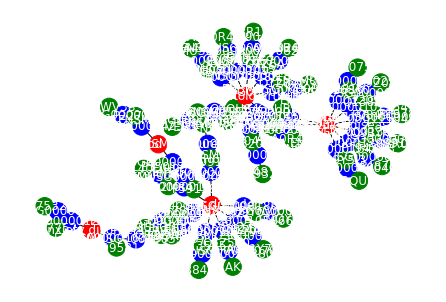

In [14]:
color_map = {'Gene': 'blue', 'Protein': 'green', 'Disease': 'red'}

# Create a list of colors for the nodes based on their type
node_colors = [color_map[M.nodes[n]['type']] for n in M.nodes()]

# Draw the graph
nx.draw(M, with_labels=True, node_color=node_colors, font_color='white')

# Show the plot
plt.show()

In [18]:
nx.info(M)

'Graph with 117 nodes and 112 edges'

In [16]:
type_counts = {}
for n in M.nodes():
    node_type = M.nodes[n]["type"]
    if node_type in type_counts:
        type_counts[node_type] += 1
    else:
        type_counts[node_type] = 1

print(type_counts)

{'Disease': 5, 'Gene': 56, 'Protein': 56}


In [94]:
# Read mock dataset
# iterate through keys of the dictionary (disease)
for disease in data.keys():
    print(disease)  # print disease name
    disease_data = data[disease]  # get the dictionary of the disease, which contains the gene and protein data
    for element in disease_data.keys():  # iterate through the keys of the disease dictionary, i.e. the gene and protein data
        print(element)  # print the key of the dictionary, e.g. human_gene
        species, type = element.split('_')  # split the key into species and type
        print(species, type)
        element_list = disease_data[element]  # get the list of genes or proteins
        print(element_list)
        for item in element_list:  # iterate through the list of genes or proteins
            print(item)
            if type == 'gene':  # if the type is gene, then the item is a tuple of gene symbol and gene id
                gene_symbol, gene_id = item
                # check if the gene is already present in the nodes of the graph
                if gene_symbol in G.nodes:
                    # if the gene is already present, then add the disease as a node attribute
                    G.nodes[gene_symbol]['disease'] = disease
                print(gene_symbol, gene_id)
            elif type == 'protein':  # if the type is protein, then the item is a tuple of protein name, protein id and protein sequence
                protein_symbol, protein_id, protein_sequence = item


schizophrenia
human_gene
human gene
[('FFTR', 'ENS000234'), ('LGPG', 'ENS0002145')]
('FFTR', 'ENS000234')
FFTR ENS000234
('LGPG', 'ENS0002145')
LGPG ENS0002145
mouse_gene
mouse gene
[('FFTR', 'ENS00098234'), ('LGPG', 'ENS00021345')]
('FFTR', 'ENS00098234')
FFTR ENS00098234
('LGPG', 'ENS00021345')
LGPG ENS00021345
human_protein
human protein
[('fftr', 'Uni12432', 'JKJSNERGIU'), ('lgpg', 'Uni12987', 'OUIHJWRTGUNRTSG')]
mouse_protein
mouse protein
[('fftr', 'Uni67932', 'AAGPALOUHSKFGJD'), ('lgpg', 'Uni0933', 'OIUHJFGOUIBHFER')]
diabetes
human_gene
human gene
[('TTRY', 'ENS00022356345'), ('UMHK', 'ENS00024635'), ('GFDS', 'ENS000556323')]
('TTRY', 'ENS00022356345')
TTRY ENS00022356345
('UMHK', 'ENS00024635')
UMHK ENS00024635
('GFDS', 'ENS000556323')
GFDS ENS000556323
mouse_gene
mouse gene
[('TTRY', 'ENS0003467'), ('UMHK', 'ENS000234667'), ('GFDS', 'ENS0005478786')]
('TTRY', 'ENS0003467')
TTRY ENS0003467
('UMHK', 'ENS000234667')
UMHK ENS000234667
('GFDS', 'ENS0005478786')
GFDS ENS0005478786


In [7]:
## takes forever to run
# Set the base URL for the API
BASE_URL = "https://rest.genenames.org"

# Define a function to get the protein for a gene
def get_protein(gene_symbol):
    url = f"{BASE_URL}/fetch/symbol/{gene_symbol}"
    headers = {
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    protein = data.get("response", {}).get("docs", [])[0].get("uniprot_ids", [])
    return protein

# Define a function to create the knowledge graph for all human genes
# def create_knowledge_graph():
#     # Create an empty graph
#     G = nx.Graph()

#     # Retrieve all human gene symbols
#     url = f"{BASE_URL}/fetch/status/Approved"
#     headers = {
#         "Accept": "application/json"
#     }
#     response = requests.get(url, headers=headers)
#     data = response.json()
#     gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

#     # Add each gene and its protein to the graph
#     for gene_symbol in gene_symbols:
#         G.add_node(gene_symbol, type="gene")
#         proteins = get_protein(gene_symbol)
#         for p in proteins:
#             G.add_node(p, type="protein")
#             G.add_edge(gene_symbol, p, type="expression")

#     return G

# # Example usage
# G = create_knowledge_graph()

# # Print the nodes and edges of the graph
# print("Nodes:", G.nodes)
# print("Edges:", G.edges)

In [54]:
#G.add_nodes_from([(1, {"type": "A"}), (2, {"type": "B"}), (3, {"type": "B"}), (4, {"type": "C"})])
#format to add nodes as a list

In [26]:
# Create an empty graph
G = nx.Graph()

# Retrieve all human gene symbols
url = f"{BASE_URL}/fetch/status/Approved"
headers = {
    "Accept": "application/json"
}
response = requests.get(url, headers=headers)
data = response.json()
gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

 

In [27]:
# Add each gene and its protein to the graph
for gene_symbol in gene_symbols[0:10]:
    # I just take the first 10 genes to make it faster
    #G.add_node(gene_symbol, type="gene")
    G.add_node(gene_symbol, type="gene", species ="Human")
    proteins = get_protein(gene_symbol)
    for p in proteins:
        G.add_node(p, type="protein")
        G.add_edge(gene_symbol, p, type="expression")
#2m 23.8s for 99 genes
#2m 26.8s for 100 genes
#11m 30.1s for 500 genes

In [59]:
print("Nodes:", G.nodes)
print("Edges:", G.edges)

Nodes: ['A1BG', 'P04217', 'A1BG-AS1', 'A1CF', 'Q9NQ94', 'A2M', 'P01023', 'A2M-AS1', 'A2ML1', 'A8K2U0', 'A2ML1-AS1', 'A2ML1-AS2', 'A2MP1', 'A3GALT2', 'U3KPV4']
Edges: [('A1BG', 'P04217'), ('A1CF', 'Q9NQ94'), ('A2M', 'P01023'), ('A2ML1', 'A8K2U0'), ('A3GALT2', 'U3KPV4')]


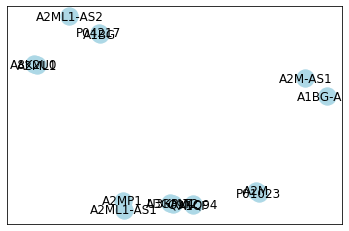

In [29]:
# Set up the layout for the graph
#pos = nx.spring_layout(G)
pos == nx.petersen_graph()
# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos)
plt.savefig("500_gene_network.png")
# Show the plot
#plt.show()


In [30]:
nx.info(G)

'Graph with 15 nodes and 5 edges'

In [31]:
type_counts = {}
for n in G.nodes():
    node_type = G.nodes[n]["type"]
    if node_type in type_counts:
        type_counts[node_type] += 1
    else:
        type_counts[node_type] = 1

print(type_counts)

{'gene': 10, 'protein': 5}


In [32]:
type_counts = {}
for n in G.nodes():
    node_type = G.nodes[n]["species"]
    if node_type in type_counts:
        type_counts[node_type] += 1
    else:
        type_counts[node_type] = 1

print(type_counts)

KeyError: 'species'

In [56]:
G.nodes[n]["type"]["species"]

TypeError: string indices must be integers

In [71]:
G.nodes["A1BG"]["species"]

'Human'

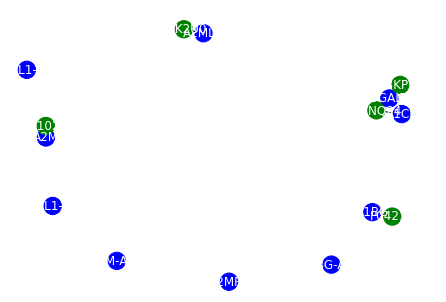

In [35]:
color_map = {'gene': 'blue', 'protein': 'green'}

# Create a list of colors for the nodes based on their type
node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]

# Draw the graph
nx.draw(G, with_labels=True, node_color=node_colors, font_color='white')

# Show the plot
plt.show()